In [1]:
import pandas as pd

In [12]:
#this is a function that does some light cleaning, by removing newline characters, converting to lowercase, and removing punctuation

def clean(text):

    #convert the text to lowercase
    text = text.lower()
    #remove punctuation
    text = ''.join([char for char in text if char.isalpha() or char.isspace()])
    #remove newline and space characters
    text = ' '.join(text.split())
    return text

In [3]:
df=pd.read_csv('IMDB Dataset.csv')

In [4]:
df

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive
...,...,...
49995,I thought this movie did a down right good job...,positive
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",negative
49997,I am a Catholic taught in parochial elementary...,negative
49998,I'm going to have to disagree with the previou...,negative


In [13]:
df["review"] = df["review"].apply(clean)

In [14]:
df["review"][0]

'one of the other reviewers has mentioned that after watching just oz episode youll be hooked they are right as this is exactly what happened with mebr br the first thing that struck me about oz was its brutality and unflinching scenes of violence which set in right from the word go trust me this is not a show for the faint hearted or timid this show pulls no punches with regards to drugs sex or violence its is hardcore in the classic use of the wordbr br it is called oz as that is the nickname given to the oswald maximum security state penitentary it focuses mainly on emerald city an experimental section of the prison where all the cells have glass fronts and face inwards so privacy is not high on the agenda em city is home to manyaryans muslims gangstas latinos christians italians irish and moreso scuffles death stares dodgy dealings and shady agreements are never far awaybr br i would say the main appeal of the show is due to the fact that it goes where other shows wouldnt dare forg

In [7]:
df["sentiment"][0]

'positive'

In [15]:
#convert to 1 if positive, 0 if negative
df["sentiment"] = df["sentiment"].apply(lambda x: 1 if x=="positive" else 0)

Logistic regression

In [28]:
#use sklearn to train a logistic regression model
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

#create bow representation of the text
vectorizer = CountVectorizer(min_df=3, max_df=0.3,)
X = vectorizer.fit_transform(df["review"])

#use sentiment as training labels
y = df["sentiment"]

#split the data into training and testing
#testing is hidden from the model during training
#verify that your model can work on new data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#train the model
#higher max_iter is always better, but depends on your computer power
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

#use trained value to see performance
y_pred = model.predict(X_test)

#print accuracy (% of unseen reviews guessed correctly)
accuracy_score(y_test, y_pred)



0.8841

In [29]:
bow_df = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names_out())

coefficients = pd.DataFrame({'feature': bow_df.columns, 'coefficient': model.coef_[0]})
coefficients = coefficients.sort_values('coefficient', ascending=False)
top_10_positive = coefficients.head(10)
top_10_negative = coefficients.tail(10)

In [30]:
top_10_negative

,feature,coefficient
28295,lacks,-1.621355
31692,mediocre,-1.651432
53448,uninteresting,-1.695787
10823,cortese,-1.700712
28631,laughable,-1.743459
19276,forgettable,-1.772390
33424,mstk,-1.922655
13721,disappointment,-2.023047
56509,worst,-2.056636
55220,waste,-2.290028


In [31]:
top_10_positive

,feature,coefficient
41363,refreshing,1.837724
23922,hooked,1.766759
19952,funniest,1.432140
13714,disappoint,1.385935
13938,dismiss,1.378450
15676,eisenstein,1.329415
34320,nevertheless,1.304859
17013,excellent,1.286973
53173,underrated,1.271104
8253,chavez,1.267609


Gensim topic model demo

In [ ]:
!pip install gensim

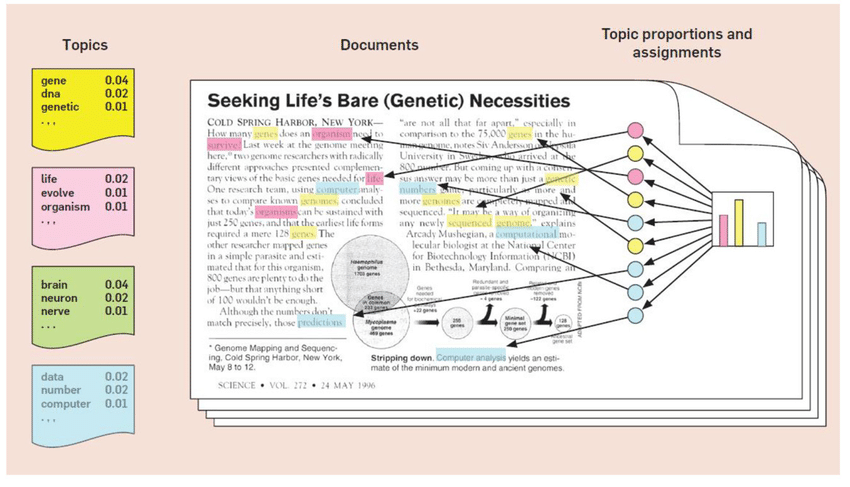

In [42]:
#train a lda topic model with gensim
from gensim import corpora
from gensim.models import LdaModel
from gensim.matutils import Sparse2Corpus

#convert bow X into a gensim corpus
corpus = Sparse2Corpus(X, documents_columns=False)

# Step 3: Create a dictionary from the vectorizer's vocabulary
id2word = dict((v, k) for k, v in vectorizer.vocabulary_.items())




In [43]:
corpus

In [45]:
#train the lda model
lda_model = LdaModel(corpus=corpus, id2word=id2word, num_topics=20)

#show the topics
lda_model.print_topics()

[(0,
  '0.014*"were" + 0.012*"book" + 0.012*"had" + 0.011*"story" + 0.010*"me" + 0.008*"well" + 0.008*"characters" + 0.007*"really" + 0.007*"did" + 0.007*"been"'),
 (1,
  '0.006*"doctor" + 0.006*"andy" + 0.005*"killer" + 0.005*"him" + 0.004*"hospital" + 0.004*"her" + 0.003*"serial" + 0.003*"caine" + 0.003*"santa" + 0.003*"dr"'),
 (2,
  '0.059*"her" + 0.043*"she" + 0.007*"love" + 0.006*"woman" + 0.006*"girl" + 0.006*"him" + 0.005*"family" + 0.005*"mother" + 0.005*"life" + 0.004*"their"'),
 (3,
  '0.012*"him" + 0.005*"man" + 0.005*"war" + 0.005*"their" + 0.005*"which" + 0.004*"into" + 0.004*"character" + 0.004*"police" + 0.004*"after" + 0.004*"story"'),
 (4,
  '0.014*"jack" + 0.010*"tom" + 0.008*"black" + 0.008*"holmes" + 0.007*"train" + 0.007*"gary" + 0.007*"him" + 0.006*"baseball" + 0.006*"ben" + 0.005*"their"'),
 (5,
  '0.006*"their" + 0.006*"man" + 0.005*"into" + 0.005*"him" + 0.005*"we" + 0.004*"get" + 0.004*"them" + 0.004*"where" + 0.003*"then" + 0.003*"down"'),
 (6,
  '0.024*"bad"

In [93]:
#evaluate topic distribution of a review from the bag of words
#print long string without having to scroll
import textwrap

pd.set_option('display.max_colwidth', None)
toprint=df["review"][30]
wrapped_string = textwrap.fill(toprint, width=80)
print(wrapped_string)


taut and organically gripping edward dmytryks crossfire is a distinctive
suspense thriller an unlikely message movie using the look and devices of the
noir cyclebr br bivouacked in washington dc a company of soldiers cope with
their restlessness by hanging out in bars three of them end up at a strangers
apartment where robert ryan drunk and belligerent beats their host sam levene to
death because he happens to be jewish police detective robert young investigates
with the help of robert mitchum whos assigned to ryans outfit suspicion falls on
the second of the three george cooper who has vanished ryan slays the third
buddy steve brodie to insure his silence before young closes inbr br abetted by
a superior script by john paxton dmytryk draws precise performances from his
three starring bobs ryan naturally does his prototypical angry white male and to
the hilt while mitchum underplays with his characteristic alert nonchalance his
role however is not central young may never have been bett

In [94]:
corpus[30]

[(18612, 1),
 (55753, 1),
 (23802, 1),
 (26281, 1),
 (12325, 1),
 (34313, 1),
 (39279, 1),
 (26097, 1),
 (50751, 2),
 (31387, 1),
 (20820, 1),
 (29223, 1),
 (50783, 1),
 (55776, 2),
 (48409, 1),
 (53945, 1),
 (4254, 1),
 (23180, 2),
 (56942, 4),
 (50839, 2),
 (51075, 1),
 (50758, 1),
 (29782, 1),
 (24176, 1),
 (48352, 1),
 (37112, 1),
 (30569, 1),
 (22129, 1),
 (3402, 1),
 (55832, 1),
 (8056, 2),
 (2092, 1),
 (37467, 1),
 (35929, 1),
 (18657, 1),
 (18140, 1),
 (29796, 1),
 (16128, 1),
 (28819, 1),
 (3916, 1),
 (35310, 1),
 (4677, 1),
 (13434, 1),
 (33438, 1),
 (46117, 1),
 (4280, 1),
 (51050, 3),
 (24188, 3),
 (14476, 1),
 (4722, 1),
 (23487, 1),
 (55908, 1),
 (4191, 1),
 (14314, 1),
 (20546, 1),
 (1445, 1),
 (30552, 1),
 (15329, 1),
 (852, 1),
 (44399, 1),
 (16668, 1),
 (27037, 1),
 (53980, 1),
 (23108, 1),
 (51009, 1),
 (42890, 2),
 (25134, 1),
 (23765, 1),
 (22428, 1),
 (48127, 1),
 (15547, 1),
 (47075, 1),
 (28878, 1),
 (47079, 1),
 (25172, 1),
 (44037, 1),
 (37484, 1),
 (10650, 1)

In [97]:
#check the topic distribution of a single review
lda_model.get_document_topics(corpus[30])

[(2, 0.036132343),
 (3, 0.7418361),
 (4, 0.02617186),
 (8, 0.014248722),
 (9, 0.045583636),
 (10, 0.067195244),
 (18, 0.056745846)]

In [102]:
models=lda_model.get_document_topics(corpus, minimum_probability=0)

In [103]:
rows=[]
for i in range(len(models)):
    row=[]
    for m in models[i]:
        row.append(m[1])
    rows.append(row)

topic_df=pd.DataFrame(rows)

In [108]:
topic_df.sort_values(3, ascending=False)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
27931,0.001727,0.001727,0.001727,0.967195,0.001727,0.001727,0.001727,0.001727,0.001727,0.001727,0.001727,0.001727,0.001727,0.001727,0.001727,0.001727,0.001727,0.001727,0.001727,0.001727
6540,0.000863,0.000863,0.000863,0.948165,0.000863,0.000863,0.000863,0.000863,0.000863,0.036297,0.000863,0.000863,0.000863,0.000863,0.000863,0.000863,0.000863,0.000863,0.000863,0.000863
343,0.000253,0.000253,0.000253,0.877425,0.000253,0.000253,0.000253,0.000253,0.000253,0.000253,0.049464,0.000253,0.000253,0.000253,0.068814,0.000253,0.000253,0.000253,0.000253,0.000253
3254,0.001742,0.001742,0.001742,0.871068,0.001742,0.055316,0.001742,0.001742,0.001742,0.043995,0.001742,0.001742,0.001742,0.001742,0.001742,0.001742,0.001742,0.001742,0.001742,0.001742
24712,0.000556,0.000556,0.000556,0.821248,0.000556,0.000556,0.000556,0.000556,0.000556,0.024104,0.000556,0.000556,0.000556,0.000556,0.000556,0.118834,0.000556,0.026914,0.000556,0.000556
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29425,0.000086,0.000086,0.049785,0.000086,0.000086,0.090400,0.039015,0.053969,0.000086,0.124926,0.015870,0.219533,0.004124,0.000086,0.000086,0.073860,0.166383,0.000086,0.077949,0.083498
8220,0.019524,0.014653,0.000075,0.000075,0.003379,0.023257,0.190100,0.000075,0.036669,0.125408,0.042900,0.000075,0.017349,0.001974,0.173004,0.248623,0.000075,0.061077,0.041634,0.000075
14797,0.000069,0.000069,0.205582,0.000069,0.000069,0.099012,0.000069,0.087053,0.000069,0.131198,0.005321,0.341953,0.000069,0.000069,0.026938,0.014865,0.000069,0.000069,0.087324,0.000069
14562,0.000068,0.018066,0.099703,0.000068,0.002478,0.221790,0.066902,0.000068,0.000068,0.146636,0.088138,0.000068,0.000068,0.003383,0.038330,0.284062,0.025613,0.000068,0.004352,0.000068


In [110]:
#evaluate topic distribution of a review from the bag of words
#print long string without having to scroll
import textwrap

pd.set_option('display.max_colwidth', None)
toprint=df["review"][6540]
wrapped_string = textwrap.fill(toprint, width=80)
print(wrapped_string)

a hotheaded cop accidentally kills a murder suspect and then covers up the crime
but must deal with a guilty conscience while he tries to solve a murder case
andrews and tierney are reunited with director preminger in a film noir that is
as effective as laura their earlier collaboration andrews is perfectly cast as
the earnest cop a good guy caught up in unfortunate circumstances the acting is
fine all around including malden as a tough police captain and tully as tierneys
protective father the screenplay by hecht a great and prolific screenwriter is
taut and suspenseful and preminger creates a great atmosphere
